## link dataset from kaggle 

<a href = "https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format"> dataset </a> 

<a href = "https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews"> project on kaggle </a>

<a href = "https://www.kaggle.com/anindya2906/glove6b?select=glove.6B.50d.txt"> glove </a>

In [2]:
!pip install kaggle

In [3]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedhassan97","key":"058bbe8a6ce8911ae383cca87a041bf0"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [5]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 35% 9.00M/25.7M [00:00<00:00, 37.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 73.9MB/s]


In [6]:
!unzip -q data.zip 

## import important libraries which you used

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation,Dense,Dropout
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize 
from nltk.tokenize.toktok import ToktokTokenizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('data.csv')
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [4]:
df['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

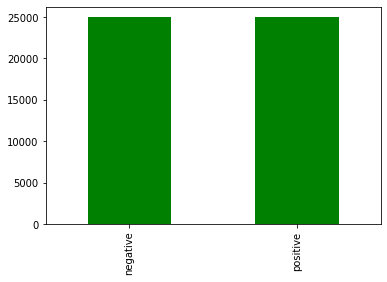

In [5]:
df.sentiment.value_counts().plot(kind = 'bar' , color = 'green')

## check if data is null

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## clean data 
- remove html tag
- remove punctution
- remove any character outside[a-z , A-Z,0-9]

In [7]:
## remove html tag
def remove_html_tag(text):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', text)
  return cleantext

## remove punct
def remove_puct(text):
  clean = re.sub(r'[^\w\s]','',text) 
  return clean 

## remove number
def remove_number(text):
  clean = re.sub(r'\d+', '', text)  
  return clean

#remove multiple spaces
def remove_multiple_spaces(text):
  clean = re.sub(' +', ' ', text)  
  return clean

# remove single char
def remove_single_char(text):
  clean =  re.sub(r"\b[a-zA-Z]\b", "", text)  
  return clean

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text  

In [8]:
## preprocess_text 

def preprocess_clean_text(text):
  output1 = remove_html_tag(text)
  output2 = remove_puct(output1)
  output3 = remove_number(output2)
  output4 = remove_multiple_spaces(output3)
  output5 = remove_single_char(output4)
  output_final = remove_special_characters(output5)

  return output_final


In [9]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))
print(len(stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
179


In [10]:
review = []
sentenses = list(df['review'])
for sent in sentenses:
  review.append(preprocess_clean_text(sent))
    

## removing stopwords

In [11]:
# cleaned data
review[4]

'Petter Matteis Love in the Time of Money is  visually stunning film to watch Mr Mattei offers us  vivid portrait about human relations This is  movie that seems to be telling us what money power and success do to people in the different situations we encounter This being  variation on the Arthur Schnitzlers play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has  sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitatThe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits  big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterThe acting is good

## converted sentiment column into number (1->>> positive &&& 0->>> negative)

In [11]:
converted = df['sentiment']
converted  = [ [1 if x == 'positive' else 0] for x in converted]

converted = np.array(list(converted))


print(converted.shape)

(50000, 1)


In [13]:
#Tokenization of text
tokenizer = ToktokTokenizer()

In [14]:
## remove stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [15]:
# tokenizer = Tokenizer(num_words=5000)
review_new = []
for sentencs in review:
  review_new = remove_stopwords(sentencs)
  



# review_train = tokenizer.texts_to_sequences(review_train)
# review_test = tokenizer.texts_to_sequences(review_test)

In [18]:
review_new[1]

'n'

In [12]:
## divide data into train and test
review_train,review_test,train_label,test_label = train_test_split(review,converted,test_size = 0.20,random_state = 42)
review_train[0]
# train_label[0]


'Thats what  kept asking myself during the many fights screaming matches swearing and general mayhem that permeate the minutes The comparisons also stand up when you think of the onedimensional characters who have so little depth that it is virtually impossible to care what happens to them They are just badly written cyphers for the director to hang his multicultural beliefs on  topic that has been done much better in other dramas both on TV and the cinemaI must confess Im not really one for spotting bad performances during  film but it must be said that Nichola Burley as the heroines slutty best friend and Wasim Zakir as the nasty bullying brother were absolutely terrible  dont know what acting school they graduated from but if  was them Id apply for  full refund post haste Only Samina Awan in the lead role manages to impress in  cast of socalled British talent that well probably never hear from again At least thats the hope Next time hire  different scoutAnother intriguing thought is

In [ ]:
print("train data is :",len(review_train))
print("train label is :",len(train_label) )
print("test data is :",len(review_test))
print("test dlabelta is :",len(test_label))

In [21]:
tokenizer = Tokenizer(num_words=5000)
data = tokenizer.fit_on_texts(review_train)

review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test)

In [22]:
print(review_train[0])


[174, 44, 753, 2034, 509, 289, 1, 102, 1853, 1935, 4168, 2, 794, 9, 1, 224, 1, 79, 861, 53, 49, 19, 99, 3, 1, 4130, 97, 33, 22, 35, 113, 1130, 9, 7, 5, 2256, 1144, 4, 440, 44, 531, 4, 92, 31, 20, 37, 910, 418, 13, 1, 171, 4, 2991, 21, 4264, 17, 2863, 9, 40, 71, 218, 69, 120, 6, 78, 3037, 188, 17, 236, 2, 1, 203, 4826, 140, 18, 59, 25, 13, 76, 348, 289, 16, 15, 7, 203, 23, 290, 9, 11, 1, 112, 432, 2, 11, 1, 1613, 615, 63, 404, 369, 86, 114, 44, 108, 371, 31, 32, 15, 42, 10, 92, 461, 13, 363, 1928, 57, 6, 1, 450, 213, 963, 4, 4069, 6, 175, 3, 3027, 665, 605, 9, 70, 230, 106, 801, 32, 168, 27, 210, 174, 1, 411, 358, 56, 3746, 265, 1640, 186, 5, 1, 706, 1817, 1, 1127, 3, 2928, 3684, 1788, 2, 150, 140, 221, 3, 204, 312, 2, 140, 1040, 12, 83, 3, 127, 2549, 15, 145, 95, 3, 1, 3942, 289, 8, 14, 997, 32, 1, 503, 241, 68, 72, 102, 102, 674, 58, 82, 63, 1291, 4, 223, 127, 20, 4169, 29, 132, 201, 1107, 11, 3548, 29, 2281, 2, 6, 8, 5, 426, 11, 621, 3, 1, 694, 2814, 1, 1230, 2, 68, 3425, 1, 171, 141

In [ ]:
review_test[0]

[59,
 402,
 8,
 662,
 4,
 1,
 158,
 3,
 1,
 1,
 2,
 37,
 1,
 158,
 519,
 10,
 212,
 4,
 66,
 13,
 43,
 278,
 3966,
 8,
 90,
 22,
 71,
 25,
 3,
 1,
 112,
 116,
 42,
 1,
 145,
 22,
 6,
 1,
 263,
 1578,
 435,
 150,
 13,
 26,
 56,
 7,
 10,
 592,
 4,
 22,
 596,
 1671,
 128,
 1417,
 552,
 128,
 15,
 140,
 1202,
 211,
 22,
 1142,
 7,
 10,
 369,
 263,
 1578,
 37,
 34,
 164,
 1021,
 5,
 6,
 5,
 369,
 78,
 4168,
 17,
 1,
 3506,
 63,
 1417,
 2739,
 978,
 1417,
 2149,
 1417,
 8,
 10,
 1,
 1578,
 110,
 744,
 21,
 189,
 797,
 3,
 644,
 2912,
 1417,
 525,
 4388,
 85,
 288,
 17,
 89,
 288,
 17,
 1668,
 2,
 518,
 12,
 1,
 2,
 10,
 200,
 47,
 212,
 89,
 2538,
 4877,
 524,
 17,
 1234,
 6,
 157,
 369,
 1021,
 1,
 3545,
 2,
 524,
 17,
 2,
 1,
 2,
 1,
 183,
 427,
 435,
 8,
 1021,
 10,
 336,
 2,
 7,
 40,
 369,
 268,
 194,
 7,
 958]

In [ ]:
## length vocab_size

vocab_size = len(tokenizer.word_index)+1
max_len = 120
print(vocab_size)

187365


In [ ]:
review_train = pad_sequences(review_train , maxlen=max_len,padding='post')
review_test  = pad_sequences(review_test , maxlen=max_len,padding='post')

In [ ]:
review_test[4]

array([  23, 1456,   13,   38,    6,   38,   85,  124,   12, 1263,    5,
         34,  142, 1398,  251,    4,   23,   44,  803,    5,  415,    4,
         23,  907,    2,  201,    6,    8,  252,  257,  121,   11, 2467,
        151,   66,   99,    9,    8,   14,    5,  632,  269,   17,  157,
       1262,  297,    1,  760, 1427,   44,   37,  199,   98,  516, 1033,
         86,   99,    7,   10,   69,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

## remove stop words